In [19]:
import numpy as np
import pandas as pd
# Import the necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
# This is the pipeline module we need for this from imblearn
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [12]:
train = pd.read_csv('/Users/halisyigin/Desktop/kusan_capstone/train_eda.csv')
#test = pd.read_csv('/Users/Yasin/Desktop/Data Science Track/Capstone2-ieee-fraud-detection/test_merged.csv')

In [13]:
train = pd.get_dummies(train, drop_first=True)
X = train.drop('isFraud', axis=1)
y = train['isFraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [14]:
#logistic regression without SMOTE
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[170789     32]
 [  6339      2]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    170821
           1       0.06      0.00      0.00      6341

    accuracy                           0.96    177162
   macro avg       0.51      0.50      0.49    177162
weighted avg       0.93      0.96      0.95    177162



In [15]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(model, X_train, y_train, cv=5))

[0.96509265 0.96515313 0.96514103 0.96520109 0.96518899]


In [16]:
#logistic regression with SMOTE
resampling = SMOTE()

X_train_new, y_train_new = resampling.fit_sample(X_train, y_train)

In [17]:
sm_model = LogisticRegression()
sm_model.fit(X_train_new, y_train_new)
y_pred_sm = sm_model.predict(X_test)
# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred_sm))
print(classification_report(y_test, y_pred_sm))

[[128990  41831]
 [  2533   3808]]
              precision    recall  f1-score   support

           0       0.98      0.76      0.85    170821
           1       0.08      0.60      0.15      6341

    accuracy                           0.75    177162
   macro avg       0.53      0.68      0.50    177162
weighted avg       0.95      0.75      0.83    177162



<Figure size 432x288 with 0 Axes>

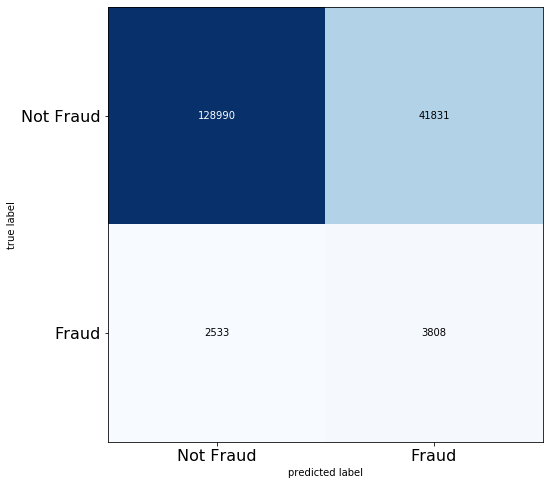

In [20]:
from mlxtend.plotting import plot_confusion_matrix

cm  = confusion_matrix(y_test, y_pred_sm)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(2), ['Not Fraud', 'Fraud'], fontsize=16)
plt.yticks(range(2), ['Not Fraud', 'Fraud'], fontsize=16)
plt.show()